<a href="https://colab.research.google.com/github/MarciaGodoy/decisiontree/blob/main/default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Aim: to predict the default of credit card holders using real dataset


# Dados

Python scripts to conduct analysis using a dataset of 29,999 instances with
23 features collected from a major bank in Taiwan, downloadable in the UC Irvine
Machine Learning Repository  at http://archive.ics.uci.edu/ml/datasets/
default+of+credit+card+clients and was initially analyzed in Yeh and
Lien (2009).

# Métodos

We review five machine learning methods: the k-nearest neighbors decision trees, boosting, support vector machine, and neural networks, and apply them to the above problem

**Descrição das variaveis**

The first group of variables contains information about the client personal information:

* ID: ID of each client, categorical variable

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* SEX: Gender, categorical variable (1=male, 2=female)
* EDUCATION: level of education, categorical variable (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status, categorical variable (1=married, 2=single, 3=others)
* AGE: Age in years, numerical variable
The following attributes contains information about the delay of the past payment referred to a specific month:

* PAY_0: Repayment status in September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August 2005 (same scale as before)
* PAY_3: Repayment status in July 2005 (same scale as before)
* PAY_4: Repayment status in June 2005 (same scale as before)
* PAY_5: Repayment status in May 2005 (same scale as before)
* PAY_6: Repayment status in April 2005 (same scale as before)

Other variables instead consider the information related to the amount of bill statement (i.e. a monthly report that credit card companies issue to credit card holders in a specific month):

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

The following variables instead consider the amount of previous payment in a specific month:

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

The last variable is the one to be predicted:

* default.payment.next.month: indicate whether the credit card holders are defaulters or non-defaulters (1=yes, 0=no)

Carregando as bibliotecas necessárias

In [202]:
import os
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import set_option
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
%matplotlib inline 


# from imblearn.under_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

import imblearn 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import performance metrics/measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import sklearn.ensemble

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

# Carregando a base de dados

In [203]:
# VARIABLES

# created a .csv version of the original dataset (.xls)
#INPUT_PATH = "https://raw.githubusercontent.com/MarciaGodoy/decisiontree/main/default%20of%20credit%20card%20clients.csv"
# created a .csv version of the original dataset (.xls)
INPUT_PATH = "https://raw.githubusercontent.com/robertofranceschi/default-credit-card-prediction/master/dataset/default%20of%20credit%20card%20clients.csv"

# SCALER = 'std'  # else 'minmax'

SHOW_FIGURE = False 

# preprocessing
FEATURE_SELECTION = False  # if 'True' Feature Selection will be applied (i.e. 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' will be removed)
APPLY_PCA = False                # if 'True' Principal Component Analysis will be applied
APPLY_OVERSAMPLING = False       # if 'True' SMOTE Oversampling will be applied

RANDOM_STATE = 42   # fixed in order to have comparable results

# Pandas options
set_option('display.max_colwidth', None)
set_option('precision', 2)



In [204]:
# read input
data = pd.read_csv(INPUT_PATH, delimiter=',')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [205]:
data.shape

(30000, 25)

In [206]:
# Dataset balanced?
if SHOW_FIGURE :
    font = FontProperties()
    font.set_family(['Times New Roman', 'serif'])
    font.set_size(14)

    plt.figure(figsize = (6,6))
    sns.countplot('default.payment.next.month', data=data, palette=['steelblue','crimson'])
    # plt.title('Class Distribution Histogram', fontsize=14)
    plt.xticks([0,1],['Not default','Default'],fontproperties=font)
    plt.ylabel('# of samples', fontproperties=font)
    plt.xlabel('')
    plt.show()
    plt.savefig('Fig - Class Distribution Histogram.png')

Verificando se há observações com missing

In [207]:
# Check missing values: no as can be also seen with data.info()
data.isnull().values.any()

False

Verificando as estatisticas descritivas

In [208]:
from scipy.interpolate.interpolate import transpose
# Summary Statistics
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5.92e+03,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,2.30e+04,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,8.33e+02,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2.01e+03,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5.00e+03,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00,1.00


In [209]:
# rename variable 'PAY_0' to 'PAY_1' 
data.rename(columns={"PAY_0": "PAY_1"}, inplace=True)
# rename target variable: 'default.payment.next.month' to 'Default'
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)



In [210]:
# drop first attribute "ID"
data.drop('ID', axis = 1, inplace =True)

In [211]:
# Class label to category
data["Default"] = data["Default"].astype('category')

Renomeando a variavel que indica se o cliente pagou ou não

Caracteristicas dos individuos da amostra

In [212]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [213]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [214]:
data['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

**Pré-processamento**
**

In [215]:
# category '0' undocumented is deleted
data = data.drop(data[data['MARRIAGE']==0].index)
# we could also group the 0 category with 3:others
# data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])

# categories 0, 5 and 6 are unknown and are deleted
data = data.drop(data[data['EDUCATION']==0].index)
data = data.drop(data[data['EDUCATION']==5].index)
data = data.drop(data[data['EDUCATION']==6].index)
# we could also group the categories together
# data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
# data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
# data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])

In [216]:
if SHOW_FIGURE :
    # 1=graduate school, 2=university, 3=high school 4=others
    data['EDUCATION'].value_counts().plot(kind='bar', figsize=(10,6))
    # plt.title("Number of cars by make")
    plt.xticks([0,1,2,3],['University','Graduate\nSchool', 'High\nSchool', 'Others'],fontproperties=font,rotation=0)
    # plt.xlabel('Education level', fontproperties=font)
    plt.ylabel('# of clients', fontproperties=font)
    plt.show()
    plt.savefig('Fig - Education Level barplot.png')

In [217]:
if SHOW_FIGURE :
    # 1=married, 2=single, 3=others
    data['MARRIAGE'].value_counts().plot(kind='bar', figsize=(10,6))
    # plt.title("Number of cars by make")
    plt.xticks([0,1,2],['Single','Married', 'Others'],fontproperties=font,rotation=0)
    # plt.xlabel('Marital Status', fontproperties=font)
    plt.ylabel('# of clients', fontproperties=font)
    # plt.show()
    plt.savefig('Fig - Marital Status.png')

In [218]:
# Payment delay description
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.00,29601.00,29601.00,29601.00,29601.00,29601.00
mean,-0.01,-0.13,-0.16,-0.22,-0.26,-0.29
std,1.12,1.20,1.20,1.17,1.14,1.15
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


Status de pagamento

In [219]:
# REPAYMENT STATUS = -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above
for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']: 
   print(f"# {att} -------")
   print(data[att].value_counts())

# PAY_1 -------
 0    14499
-1     5633
 1     3662
-2     2708
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
# PAY_2 -------
 0    15476
-1     5990
 2     3904
-2     3722
 3      326
 4       97
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
# PAY_3 -------
 0    15518
-1     5863
-2     4027
 2     3802
 3      237
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
# PAY_4 -------
 0    16204
-1     5617
-2     4287
 2     3142
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64
# PAY_5 -------
 0    16684
-1     5480
-2     4479
 2     2617
 3      177
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
# PAY_6 -------
 0    16053
-1     5674
-2     4806
 2     2756
 3      183
 4       49
 7       46
 6       19
 5       13
 8        2
Name: 

In [220]:
data.LIMIT_BAL.describe()

count      29601.00
mean      167550.54
std       129944.02
min        10000.00
25%        50000.00
50%       140000.00
75%       240000.00
max      1000000.00
Name: LIMIT_BAL, dtype: float64

In [221]:
if SHOW_FIGURE :
    # Creating a new dataframe with categorical variables
    subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']]

    f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
    f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
    ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
    ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
    ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
    ax4 = sns.countplot(x="PAY_1", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
    ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
    ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
    ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
    ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
    ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

Distribuição do limite de crédito

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


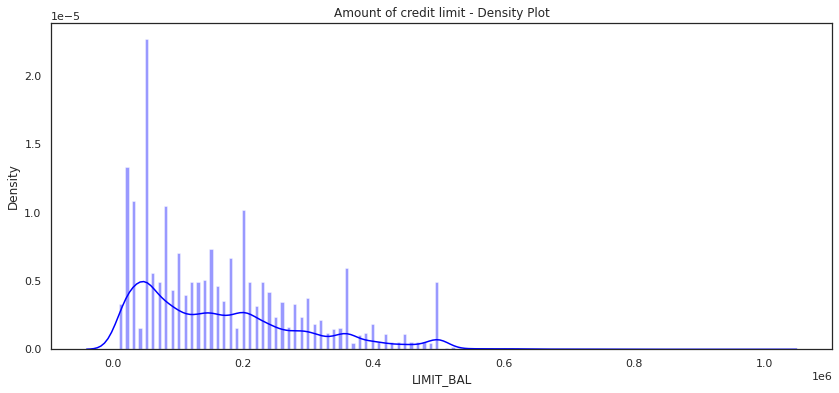

In [222]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

In [223]:
data['LIMIT_BAL'].value_counts().head(10)

50000.0     3331
20000.0     1955
30000.0     1586
80000.0     1542
200000.0    1498
150000.0    1080
100000.0    1035
180000.0     979
360000.0     872
60000.0      819
Name: LIMIT_BAL, dtype: int64

In [224]:
x1 = list(data[data['Default'] == 1]['LIMIT_BAL'])
x2 = list(data[data['Default'] == 0]['LIMIT_BAL'])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


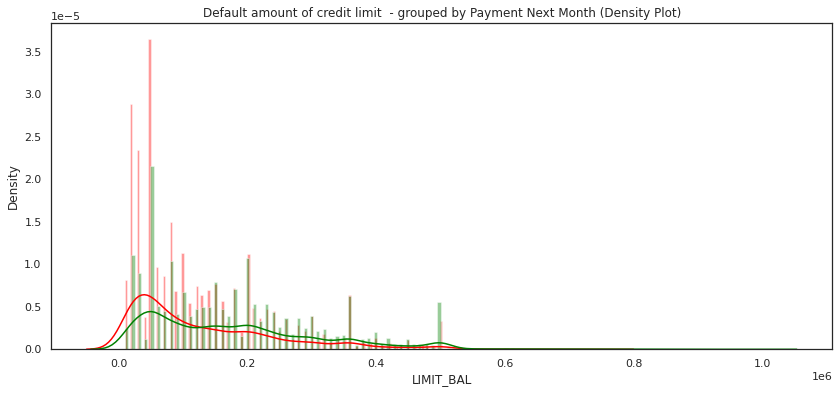

In [225]:
class_1 = data.loc[data['Default'] == 1]["LIMIT_BAL"]
class_0 = data.loc[data['Default'] == 0]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.savefig('Fig - Density plot LIMIT_BAL grouped by label.png')

In [226]:
if SHOW_FIGURE :
    # HISTOGRAMS PLOTS FOR FEATURES IMPORTANCE
    fig, axes= plt.subplots(6,4, figsize=(12,12))
    non_def = data[data.Default==0]
    default = data[data.Default==1]
    ax = axes.ravel()

    for i,label in enumerate(data.columns[:-1]):
        _,bins = np.histogram(data[label],bins=100)
        ax[i].hist(non_def[label],bins=bins,color='r',alpha=.5)# red color for malignant class
        ax[i].hist(default[label],bins=bins,color='g',alpha=0.3)# alpha is for transparency in the overlapped region
        ax[i].set_title(data.columns[i],fontsize=9)
        ax[i].axes.get_xaxis().set_visible(True) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
        ax[i].set_yticks(())


    ax[0].legend(['Non Default','Default'],loc='best',fontsize=8)
    plt.tight_layout() # let's make good plots
    plt.show()

In [227]:
data.describe

<bound method NDFrame.describe of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0        20000.0    2          2         1   24      2      2     -1     -1   
1       120000.0    2          2         2   26     -1      2      0      0   
2        90000.0    2          2         2   34      0      0      0      0   
3        50000.0    2          2         1   37      0      0      0      0   
4        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995   220000.0    1          3         1   39      0      0      0      0   
29996   150000.0    1          3         2   43     -1     -1     -1     -1   
29997    30000.0    1          2         2   37      4      3      2     -1   
29998    80000.0    1          3         1   41      1     -1      0      0   
29999    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...

# MATRIZ DE CORRELAÇÃO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


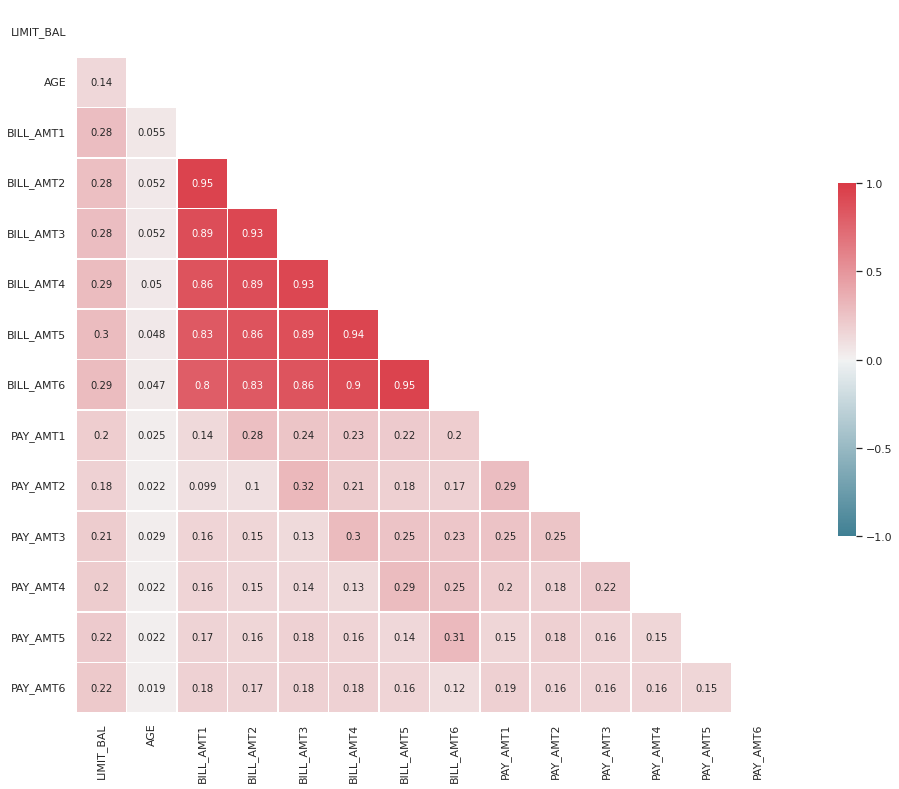

In [228]:
# Correlation matrix
sns.set(style="white", font_scale=1)
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
corr = data[numeric].corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
# plt.xticks(fontsize=6)
# plt.yticks(fontsize=10)
# plt.show()
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

Observe que há alta correlação entre algumas variaveis, por exemplo BILL_AMT1 and BILL_AMT2 tem 0,95. 

# Gráficos

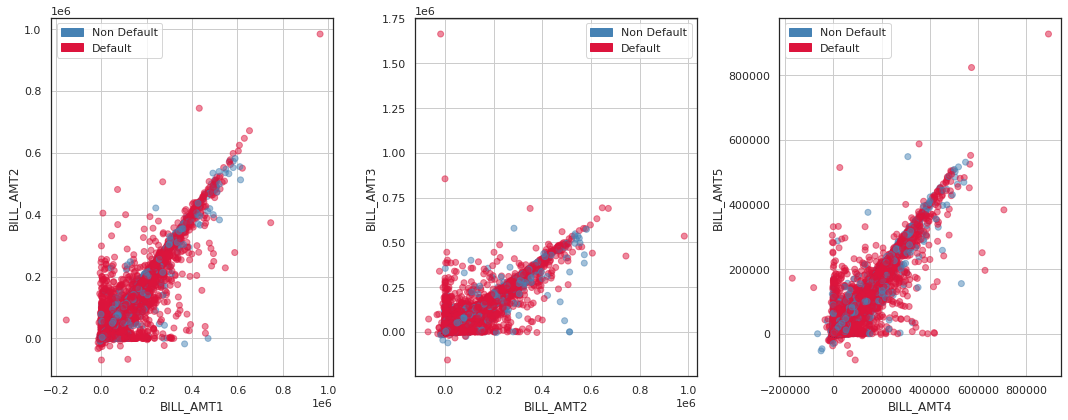

In [229]:
#distribution correlated features -- scatter interaction
import matplotlib.patches as mpatches


data_np=data.to_numpy()
target=data.Default

# variables to 
BILL_AMT1 = data['BILL_AMT1'].to_numpy()
BILL_AMT2 = data['BILL_AMT2'].to_numpy()
BILL_AMT3 = data['BILL_AMT3'].to_numpy()
BILL_AMT4 = data['BILL_AMT4'].to_numpy()
BILL_AMT5 = data['BILL_AMT5'].to_numpy()
BILL_AMT6 = data['BILL_AMT6'].to_numpy()
AGE = data['AGE'].to_numpy()
LIMIT_BAL = data['LIMIT_BAL'].to_numpy()
PAY_AMT1 = data['PAY_AMT1'].to_numpy()

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='steelblue', label='Non Default')
pop_b = mpatches.Patch(color='crimson', label='Default')
colors=['crimson', 'steelblue']

ax[0].scatter(BILL_AMT1, BILL_AMT2, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('BILL_AMT1')
ax[0].set_ylabel('BILL_AMT2')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(BILL_AMT2, BILL_AMT3, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('BILL_AMT2')
ax[1].set_ylabel('BILL_AMT3')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(BILL_AMT4,BILL_AMT5, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('BILL_AMT4')
ax[2].set_ylabel('BILL_AMT5')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

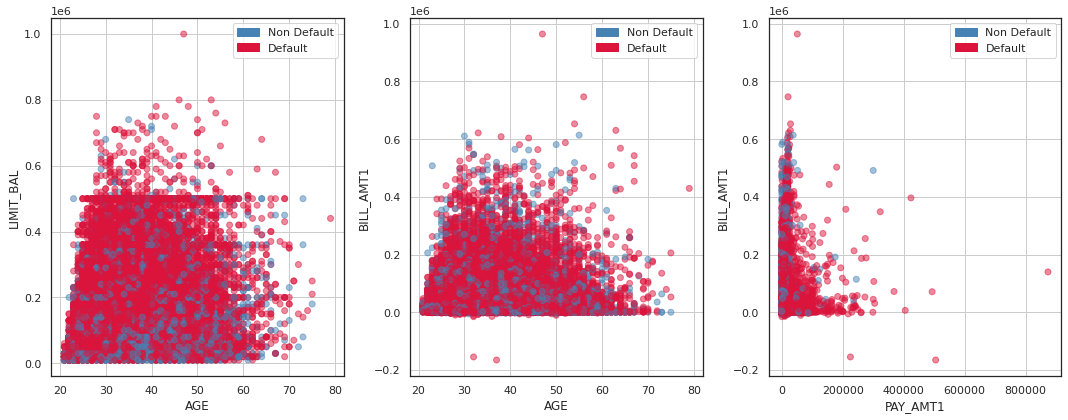

In [230]:
#distribution un-correlated features -- scatter interaction

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='steelblue', label='Non Default')
pop_b = mpatches.Patch(color='crimson', label='Default')
colors=['crimson', 'steelblue']

ax[0].scatter(AGE, LIMIT_BAL, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('AGE')
ax[0].set_ylabel('LIMIT_BAL')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(AGE, BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('AGE')
ax[1].set_ylabel('BILL_AMT1')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(PAY_AMT1,BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('PAY_AMT1')
ax[2].set_ylabel('BILL_AMT1')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

# Geração de dummies-one-hot encoding

As variaveis categoricas foram transformadas em one-hot encoding (10, 01, etc)

In [231]:
# Set 'category' type to categorical attributes
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
  data[att] = data[att].astype('category')

# one-hot encoding
data=pd.concat([pd.get_dummies(data['SEX'], prefix='SEX'),
                pd.get_dummies(data['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE'),
                data],axis=1)
# drop original columns
data.drop(['EDUCATION'],axis=1, inplace=True)
data.drop(['SEX'],axis=1, inplace=True)
data.drop(['MARRIAGE'],axis=1, inplace=True)
# print samples
data.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,0,1,0,1,0,0,1,0,0,20000.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,0,1,0,1,0,0,0,1,0,120000.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,0,1,0,1,0,0,0,1,0,90000.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,0,1,0,1,0,0,1,0,0,50000.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,1,0,0,1,0,0,1,0,0,50000.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Excluindo a variavel de interesse (default)

In [232]:
# Separating features and target
y = data.Default     # target default=1 or non-default=0
X = data.drop('Default', axis = 1, inplace = False)

In [233]:
# Check data set dimension
print(X.shape)
print("Number of samples:", X.shape[0])
print("Number of attributes:", X.shape[1])

(29601, 29)
Number of samples: 29601
Number of attributes: 29


# Treinamento e teste

Fazendo banco de teste (30%) e treinamento (70%)

In [234]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state= RANDOM_STATE, stratify=y)

In [235]:
# C values tuned:
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

Apresenta numero de devedores em treinamento e teste

In [236]:
# Check dimensions
print(np.shape(X_train_val))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-defaulters (y=0): {len(y_train_val[y_train_val==0])}")
print(f" + Defaulters (y=1):\t {len(y_train_val[y_train_val==1])}")

print("Test set:")
print(f" + Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f" + Defaulters (y=1):\t {len(y_test[y_test==1])}")

(22200, 29)
(7401, 29)
Training set:
 + Non-defaulters (y=0): 17246
 + Defaulters (y=1):	 4954
Test set:
 + Non-defaulters (y=0): 5750
 + Defaulters (y=1):	 1651


In [237]:
if FEATURE_SELECTION :
    # remove features with correlation coefficent >= 0.93
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] >= 0.92)]
    print(to_drop) #['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    data= data.drop(data[to_drop], axis = 1)

# Analise de Componentes principais

PCA is an unsupervised learning technique that performs a linear transformation (by means of an orthogonal matrix) of the original space such that the new basis found has dimensions (features) that are sorted from largest to smallest possible variance.

Actual number of components: 29


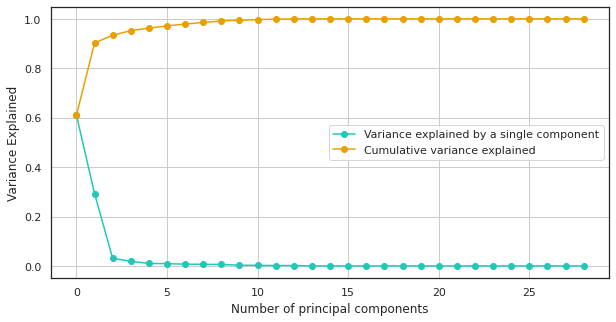

In [238]:
from sklearn.decomposition import PCA

print(f"Actual number of components: {len(X_train_val.columns.values)}")

n_pc = len(X_train_val.columns.values) # with n_components = 11 -> 0.98693009 variance explained

pca = PCA(n_components=n_pc)
pca.fit(X_train_val)

# print(np.cumsum(pca.explained_variance_ratio_))
# print(pca.explained_variance_ratio_)

fig=plt.figure(1, figsize=(10,5))
plt.grid(b=True, which='major', axis='both')
plt.plot(pca.explained_variance_ratio_, marker='o', color='#20c8b8')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='#e8a000')
# plt.xticks([n for n in range(0,n_pc)], [ "PC"+str(n) for n in range(1,n_pc+1)])
plt.legend(["Variance explained by a single component", "Cumulative variance explained"])
plt.xlabel('Number of principal components')
plt.ylabel('Variance Explained')
plt.savefig("PCA");

O gráfico acima mostra a proporção da variação explicada: a linha verde representa a proporção da variancia explicada por cada componente principal. A linha laranja é o acumulado da proporção da variancia explicada. 
O gráfico é útil para tomada de decisão sobre o número de componentes a serem utilizados no modelo. Note que após 5 elementos o ganho adicional é pequeno.



In [239]:
n_pc = 12
pca = PCA(n_components=n_pc)
pca.fit(X_train_val)
#   X_train_val.index = pd.RangeIndex(start=0, stop=len(X_train_val), step=1)
X_12d_train_val = pd.DataFrame(pca.transform(X_train_val))
X_12d_test = pd.DataFrame(pca.transform(X_test))
X_12d_train_val.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_12d_test.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_12d_train_val.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-29145.09,57140.59,60938.30,-33190.31,52502.91,99974.15,16357.08,-87923.68,-31970.82,-20530.88,-7519.51,8686.14
1,377622.50,87974.47,-28754.01,-5973.81,-15505.97,7729.31,-703.55,225.97,6720.70,3782.91,4955.01,-2012.16
2,15144.81,179333.79,26411.90,-12156.63,11897.87,-20847.48,-12374.43,-46286.01,-390.24,-16398.59,7031.34,-173.31
3,-48140.96,-4741.26,15085.16,-711.65,-7053.53,894.80,4349.37,3156.80,-112.80,2921.08,-740.78,-448.02
4,384202.97,164644.23,-102846.21,31301.00,-4247.20,-1861.46,29573.79,-2968.63,-26121.77,-3045.58,15950.87,-1977.38


# Resultado PCA

In [240]:
APPLY_PCA = False

if APPLY_PCA: 
    X_train_val = X_12d_train_val
    X_test = X_12d_test
    print(X_12d_train_val.shape)
    print(X_12d_test.shape)
    
print(f"PCA APPLIED: {APPLY_PCA}")
print(X_train_val.shape)
print(X_test.shape)

PCA APPLIED: False
(22200, 29)
(7401, 29)


Importando as bibliotecas necessárias

In [241]:
from sklearn import metrics

In [242]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score, plot_confusion_matrix

In [243]:
# PARAMETER CLASSIFICATION
ALGORITHM = 'LogisticRegression' # 'RandomForest', 'LogisticRegression', 'LDA', 'KNN'
APPLY_OVERSAMPLING = False
APPLY_UNDERSAMPLING = True

if APPLY_OVERSAMPLING:
    APPLY_UNDERSAMPLING = False
    
if APPLY_UNDERSAMPLING:
    APPLY_OVERSAMPLING = False


# Treinamento e validação

In [244]:
# TRAIN AND VALIDATION
# Stratified K-Fold Cross Validation

# Pipeline
if ALGORITHM == 'SVM' : 
    # Support Vector Machine (SVM) classifier
    # best config found {'C': 1, 'gamma': 0.01, 'kernel': 'poly'} # 0.7963817277250114
    parameter_grid = {
      'C': [100, 0.1, 1, 10],
      'kernel': ['rbf', 'poly'],
      'gamma': [0.0001, 0.001, 0.01]
    }
    clf_name = 'svc__'
    classifier = SVC() # or SVC
    
elif ALGORITHM == 'RandomForest':
    # Random Forest classifier
    # {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__oob_score': True}
    parameter_grid = {
      "criterion":["gini", "entropy"],
      "max_features":[None, "sqrt"],
      "oob_score":[True],
      "n_estimators":[10, 50, 100, 200]
    }
    clf_name = 'randomforestclassifier__'
    classifier = RandomForestClassifier()
    
elif ALGORITHM == 'LogisticRegression':
    # Logistic Regression classifier
    parameter_grid = {
        "C":[0.0001, 0.001, 0.01, 0.1, 1, 10]
    }
    clf_name = 'logisticregression__'
    classifier = LogisticRegression()
    
elif ALGORITHM == 'KNN':
    # K-Nearest Neighbors classifier
    parameter_grid = {
        "n_neighbors":[500, 800, 1500, 2500, 3500, 4500]
    }
    clf_name = 'kneighborsclassifier__'
    classifier = KNeighborsClassifier() 
else :
    raise RuntimeError("Choose a correct classifier.");
    

new_params = {clf_name + key: parameter_grid[key] for key in parameter_grid}



Acurácia do Modelo

In [245]:
# TEST
# evaluation on test data with bestparams

# Oversampling
smote = SMOTE()
X_train_val, y_train_val = smote.fit_resample(X_train_val, y_train_val)

# retrain with best params
clf = classifier
clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)

print(accuracy, f1, precision, recall)
print(f"")

# print(classification_report())



KeyboardInterrupt: ignored

* Acurácia 68%
* Precisão 33%

# Matriz de resultado

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues, 
                                 #display_labels=data.target_names, 
                                 normalize='true')

disp.ax_.set_title(f'normalized confusion matrix {clf_name}')

In [ ]:
#print(classification_report())

# Decision Tree

as Árvores de Decisão são algoritmos versáteis de Aprendizado de
Máquina que podem executar tarefas de classificação, regressão e, até mesmo, tarefas multioutput. São algoritmos muito poderosos capazes de moldar conjuntos complexos de dados.

Árvores de Decisão têm muitas vantagens:
são fáceis de entender, interpretar, usar, e são versáteis e poderosas.


algumas limitações. Primeiro, como você pode ter percebido, as Árvores de Decisão adoram fronteiras ortogonais de decisão (todas as divisões são perpendiculares a um eixo), o que as torna sensíveis à rotação do conjunto de treinamento.
De um modo mais geral, o principal problema com as Árvores de Decisão é que elas são muito sensíveis a pequenas variações nos dados de treinamento.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

A medida do coeficiente de Gini é aplicada por padrão, mas você pode selecionar a medida de impureza da entropia ao configurar o hiperparâmetro criterion para “entropy”. O conceito de entropia originou-se na termodinâmica como uma medida da desordem molecular: a entropia aproxima-se de zero quando as moléculas ainda estão paradas e bem ordenadas.

"La reina del Olimpo es la diosa entropía" - [texto do link](https://www.vagalume.com.br/daniel-drexler/la-voz-de-la-diosa-entropia-feat-kevin-johansen.html)

In [ ]:
#Best configuration found 
#Data prepocessing: PCA+SMOTE
params = {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'splitter': 'best'}

In [ ]:
#Best configuration found 
#Data prepocessing: PCA+SMOTE
params = {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
def calc_testing_score (X_train_val, y_train_val, X_test, y_test, clf):
  clf = clf.fit(X_train_val, y_train_val)
  y_pred = clf.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  return accuracy

In [ ]:
param_range = np.arange( .1, .9, .1) 
for i in np.arange (.1, .9, .1):
      clf = DecisionTreeClassifier(min_samples_split = i)
      clf2 = DecisionTreeClassifier(criterion = "entropy", min_samples_split = i)
      AccuracyTest = calc_testing_score(X_train_val, y_train_val, X_test, y_test, clf)
      AccuracyTest2 = calc_testing_score(X_train_val, y_train_val, X_test, y_test, clf2)

In [252]:
from  sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [251]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [250]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[11] <= 1.5\ngini = 0.347\nsamples = 29601\nvalue = [22996, 6605]'),
 Text(0.25, 0.5, 'X[12] <= 1.5\ngini = 0.279\nsamples = 26502\nvalue = [22067, 4435]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.247\nsamples = 24242\nvalue = [20751, 3491]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.486\nsamples = 2260\nvalue = [1316, 944]'),
 Text(0.75, 0.5, 'X[13] <= -0.5\ngini = 0.42\nsamples = 3099\nvalue = [929, 2170]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.497\nsamples = 187\nvalue = [101, 86]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.407\nsamples = 2912\nvalue = [828, 2084]')]

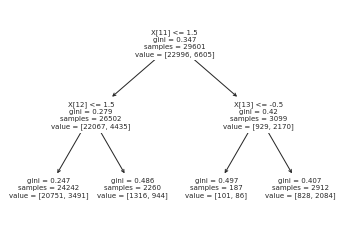

In [247]:
tree.plot_tree(tree_clf)

In [248]:
#clf.predict([[800, 800]])

 

1.   min_samples_split (o número mínimo de amostras que um nó deve ter antes que possa ser dividido)
2.   min_samples_leaf (o número mínimo de amostras que um nó da folha deve ter)
1.   min_weight_fraction_leaf (o mesmo de min_samples_leaf, mas expressa como uma fração do número total de instâncias ponderadas),

2.   
 max_leaf_nodes (número máximo de nós da folha)


1.   max_features (número máximo de características que são avaliadas para divisão em cada nó).

 

In [249]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [253]:
import graphviz 

[Text(0.5, 0.8333333333333334, 'X[11] <= 1.5\ngini = 0.347\nsamples = 29601\nvalue = [22996, 6605]'),
 Text(0.25, 0.5, 'X[12] <= 1.5\ngini = 0.279\nsamples = 26502\nvalue = [22067, 4435]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.247\nsamples = 24242\nvalue = [20751, 3491]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.486\nsamples = 2260\nvalue = [1316, 944]'),
 Text(0.75, 0.5, 'X[13] <= -0.5\ngini = 0.42\nsamples = 3099\nvalue = [929, 2170]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.497\nsamples = 187\nvalue = [101, 86]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.407\nsamples = 2912\nvalue = [828, 2084]')]

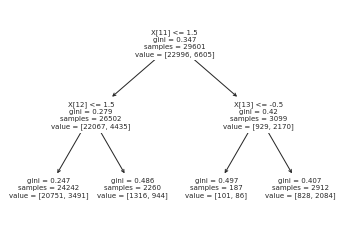

In [254]:
tree.plot_tree(tree_clf)

In [255]:
dot_data = tree.export_graphviz(tree_clf, out_file=None) 

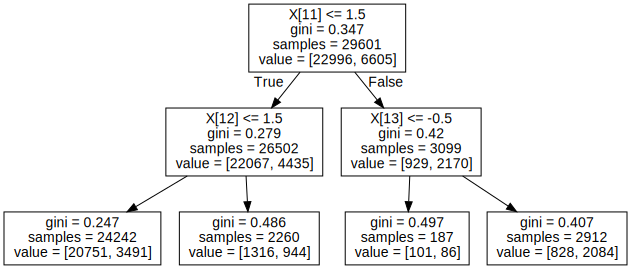

In [256]:
graph = graphviz.Source(dot_data)  
graph

In [257]:
graph.render("default")

'default.pdf'

In [258]:
#Data prepocessing: PCA+SMOTE
params = {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'splitter': 'best'}

# KNN

In [259]:
from sklearn.neighbors import KNeighborsClassifier

In [260]:
param_range = range (1, 100,20)
for i in range (1,100,20):
    clf = KNeighborsClassifier(n_neighbors= i)
    clf2 = KNeighborsClassifier(n_neighbors= i, weights= "distance")
    AccuracyTest = calc_testing_score(X_train_val, y_train_val, X_test, y_test, clf)
    AccuracyTest2 = calc_testing_score(X_train_val, y_train_val, X_test, y_test, clf2)

Modelo Boruta

In [263]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.1 MB/s 


In [267]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
 

In [268]:
# seleção de variáveis com o Boruta
# inicializa o Random Forest para o Boruta (max_depth de 3 a 7 segundo o github do Boruta)
rf_boruta = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=5)

# define o Boruta como método de seleção de variáveis
boruta = BorutaPy(estimator = rf_boruta, n_estimators = 'auto', verbose=2, random_state=42, max_iter = 100)

# fit Boruta 
boruta.fit(np.array(preditoras), np.array(desfecho))

# mostrando os resultados
area_verde = preditoras.columns[boruta.support_].to_list()
area_azul = preditoras.columns[boruta.support_weak_].to_list()

# manter
print('Variáveis na área verde:', area_verde)

NameError: ignored

# Regressão Logistica 

mudei random_state para None

In [ ]:
#kf = StratifiedKFold(n_splits=5, random_state=None)

#if APPLY_OVERSAMPLING:
    # apply oversampling on training dataset
    imba_pipeline = make_pipeline(SMOTE(random_state=None), classifier)
elif APPLY_UNDERSAMPLING:
    # TO DO
    imba_pipeline = make_pipeline(ClusterCentroids(random_state=None), classifier)
else :
    # DO NOT apply oversampling on training dataset, just the classifier
    imba_pipeline = make_pipeline(classifier)


#SCORE = 'precision' # 'accuracy', 'precision', 'recall', 'f1'
#grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=SCORE, return_train_score=True)

grid_imba.fit(X_train_val, y_train_val)

print(f"Best configuration found for {classifier}:")
print(grid_imba.best_params_)
print(f"Val {SCORE}:   {grid_imba.best_score_}")